In [73]:
#Import pandas so we can import our large cleaned data set, then we need to import the cleaned churn file provided to us in the data dictionary
#Jupyter Lab 3.44, Python 3
import pandas as pd

#Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

#Baisc math imports
import numpy as np
from pandas import DataFrame

#For Visualizations
import seaborn as sb
import matplotlib.pyplot as mpl

#If your machine does not have mlxtend, if you get an error when importing. Open the command prompt on your machine and run "pip install mlxtend" or "pip install apyori" if you need that module
#Market Basket algos
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
# from apyori import apriori
from mlxtend.frequent_patterns import association_rules
from yellowbrick.cluster import KElbowVisualizer

#Missing Values visualization
import missingno as msno

#Import Dataset
telo_df = pd.read_csv(r'C:\Users\seans\Documents\WGU\D212\teleco_market_basket.csv')

In [74]:
#Gather information about dataset
telo_df.describe()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,97,88,80,66,50,43,28,19,8,3,3,3,1
top,Dust-Off Compressed Gas 2 pack,Dust-Off Compressed Gas 2 pack,Dust-Off Compressed Gas 2 pack,Dust-Off Compressed Gas 2 pack,Apple USB-C Charger cable,USB 2.0 Printer cable,Apple USB-C Charger cable,Apple USB-C Charger cable,Apple USB-C Charger cable,Apple USB-C Charger cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,Apple USB-C Charger cable,Apple USB-C Charger cable,ARRIS SURFboard SB8200 Cable Modem,3A USB Type C Cable 3 pack 6FT,SanDisk Ultra 128GB card,Brother Genuine High Yield Toner Cartridge,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [75]:
telo_df.head()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
#View data types
telo_df.dtypes

Item01    object
Item02    object
Item03    object
Item04    object
Item05    object
Item06    object
Item07    object
Item08    object
Item09    object
Item10    object
Item11    object
Item12    object
Item13    object
Item14    object
Item15    object
Item16    object
Item17    object
Item18    object
Item19    object
Item20    object
dtype: object

In [77]:
#Check for any missing values
telo_df.isna().sum()

Item01     7501
Item02     9255
Item03    10613
Item04    11657
Item05    12473
Item06    13138
Item07    13633
Item08    14021
Item09    14348
Item10    14607
Item11    14746
Item12    14848
Item13    14915
Item14    14955
Item15    14977
Item16    14994
Item17    14998
Item18    14998
Item19    14999
Item20    15001
dtype: int64

<AxesSubplot:>

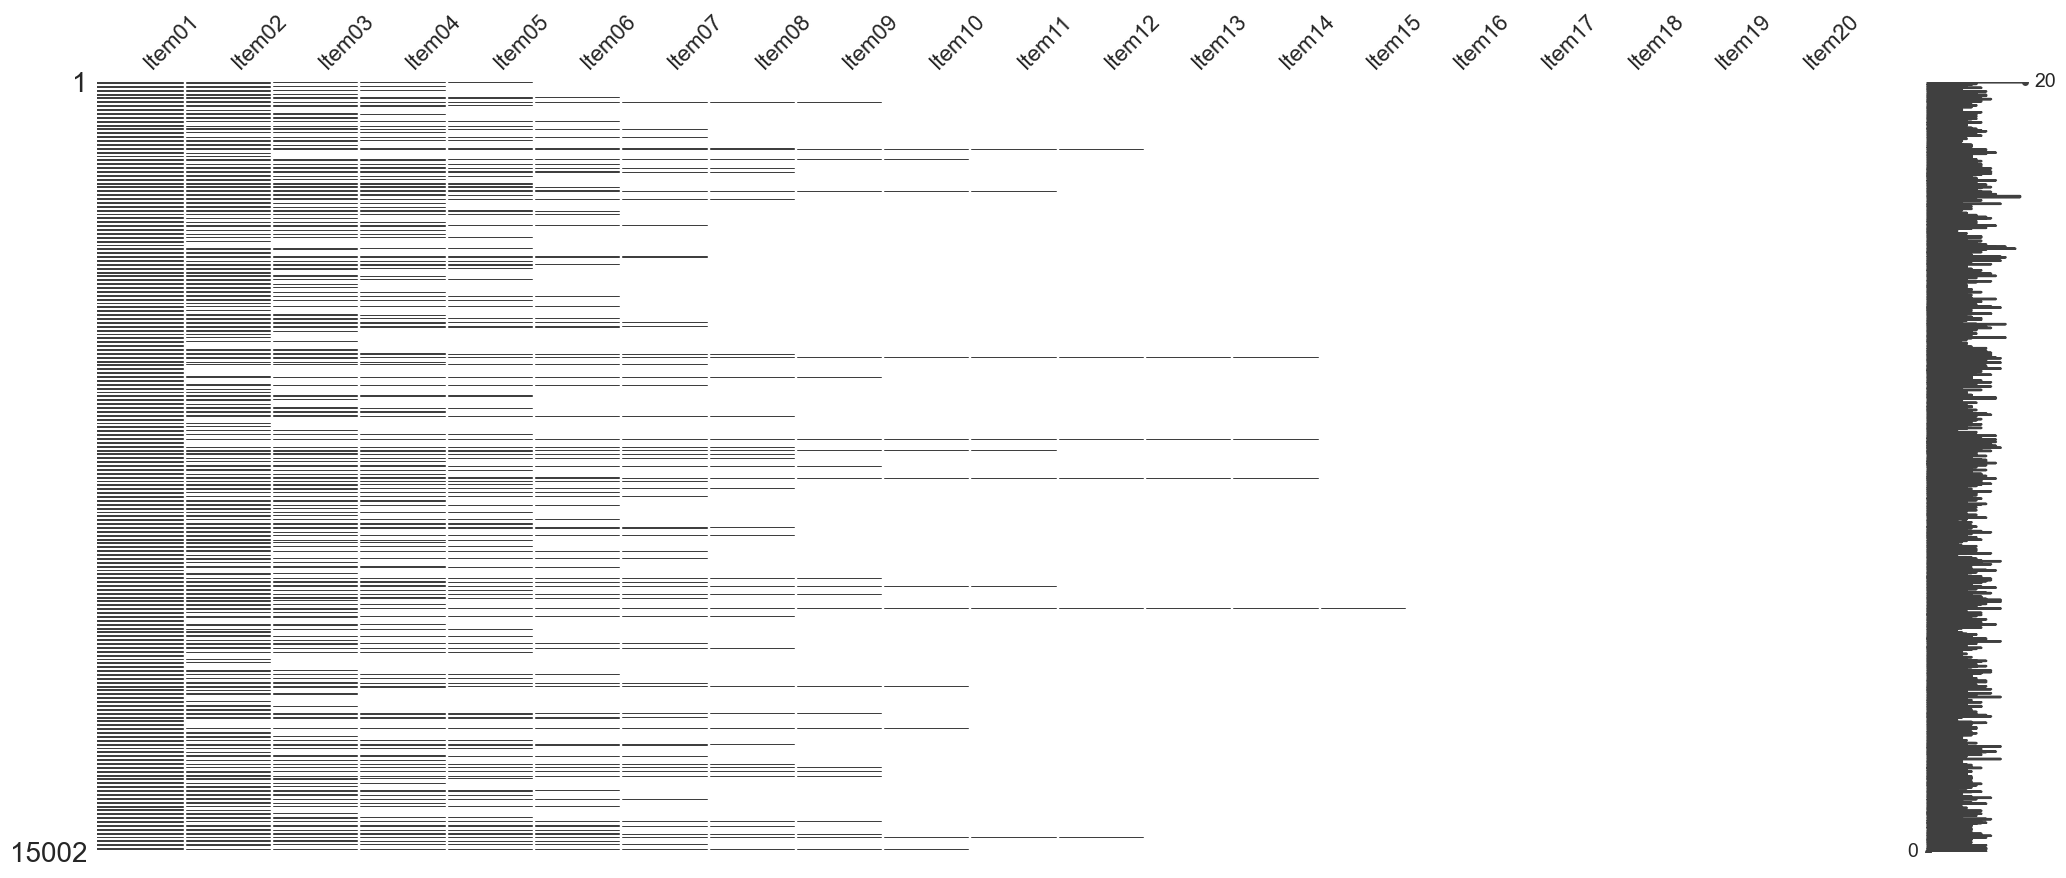

In [78]:
# Visualize missing values as a matrix
msno.matrix(telo_df)

In [79]:
#Drop records with missing values
telo_df.dropna(how='all', inplace=True)
# Converting null to 0
telo_df.fillna(0, inplace=True)

<AxesSubplot:>

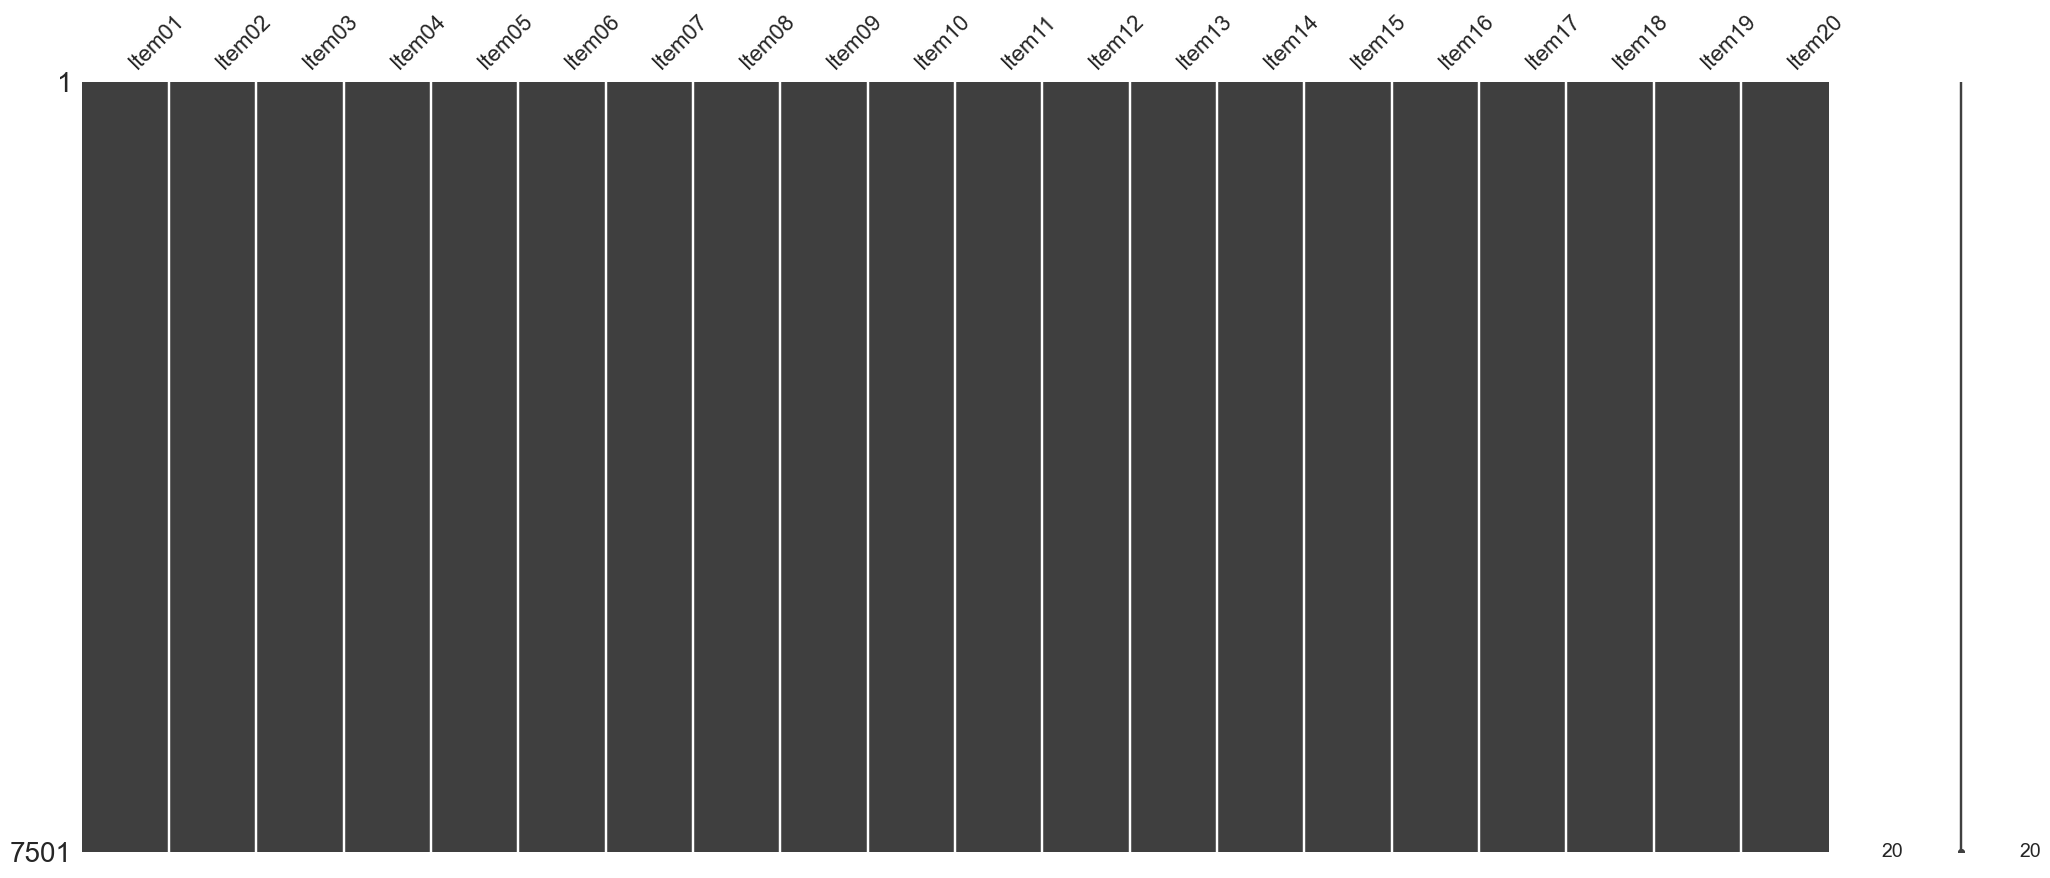

In [80]:
# Visualize missing values as a matrix
msno.matrix(telo_df)

In [81]:
#View dataset again
telo_df.head()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,UNEN Mfi Certified 5-pack Lightning Cable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Cat8 Ethernet Cable,HP 65 ink,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit,Moread HDMI to VGA Adapter,HP 62XL Tri-Color ink,Apple USB-C Charger cable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
# Confirm no null values, we have no blank rows or columns. Yay!
telo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7501 entries, 1 to 15001
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Item01  7501 non-null   object
 1   Item02  7501 non-null   object
 2   Item03  7501 non-null   object
 3   Item04  7501 non-null   object
 4   Item05  7501 non-null   object
 5   Item06  7501 non-null   object
 6   Item07  7501 non-null   object
 7   Item08  7501 non-null   object
 8   Item09  7501 non-null   object
 9   Item10  7501 non-null   object
 10  Item11  7501 non-null   object
 11  Item12  7501 non-null   object
 12  Item13  7501 non-null   object
 13  Item14  7501 non-null   object
 14  Item15  7501 non-null   object
 15  Item16  7501 non-null   object
 16  Item17  7501 non-null   object
 17  Item18  7501 non-null   object
 18  Item19  7501 non-null   object
 19  Item20  7501 non-null   object
dtypes: object(20)
memory usage: 1.2+ MB


In [83]:
#Extract the cleaned market basket analysis
telo_df.to_csv('Market_Basket_Prepared.csv')

In [84]:
#Convert dataset into list format for use with Apriori algorithm, list of lists.
telo_list = []
for i in range(0, 7501):
    telo_list.append([str(telo_df.values[i, j]) for j in range(0, 20)])
    
#Transform the list of list into an array so we can analysis it
TE = TransactionEncoder()
array = TE.fit(telo_list).transform(telo_list)

In [85]:
#Create the dataframe from our array, rows are logical and columns are the purchased items. Remove the first column that is just 0
df = pd.DataFrame(array, columns = TE.columns_)
df = df.drop(['0'],axis=1)
#Extract the fully prepared dataframe
df.to_csv('Ready_to_Run.csv')
print(df.info())
print(df.shape)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Columns: 119 entries, 10ft iPHone Charger Cable to seenda Wireless mouse
dtypes: bool(119)
memory usage: 871.8 KB
None
(7501, 119)


,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [86]:
#Viewing our columns
for col in df.columns:
 print(col)

10ft iPHone Charger Cable
10ft iPHone Charger Cable 2 Pack
3 pack Nylon Braided Lightning Cable
3A USB Type C Cable 3 pack 6FT
5pack Nylon Braided USB C cables
ARRIS SURFboard SB8200 Cable Modem
Anker 2-in-1 USB Card Reader
Anker 4-port USB hub
Anker USB C to HDMI Adapter
Apple Lightning to Digital AV Adapter
Apple Lightning to USB cable
Apple Magic Mouse 2
Apple Pencil
Apple Pencil 2nd Gen
Apple Power Adapter Extension Cable
Apple USB-C Charger cable
AutoFocus 1080p Webcam
BENGOO G90000 headset
Blue Light Blocking Glasses
Blue Light Blocking Glasses 2pack
Brother Genuine High Yield Toner Cartridge
Cat 6 Ethernet Cable 50ft
Cat8 Ethernet Cable
CicTsing MM057 2.4G Wireless Mouse
Cleaning Gel Universal Dust Cleaner
Creative Pebble 2.0 Speakers
DisplayPort ot HDMI adapter
Dust-Off Compressed Gas
Dust-Off Compressed Gas 2 pack
FEEL2NICE 5 pack 10ft Lighning cable
FEIYOLD Blue light Blocking Glasses
Falcon Dust Off Compressed Gas
HOVAMP Mfi 6pack Lightning Cable
HOVAMP iPhone charger
HP 61 

In [87]:
#Running our Apriori Algorithm. You can change the min_support value based on the target threshold from the organization at a later time if needed
rules = apriori(df, min_support = 0.001, use_colnames = True)
rules.head()

,support,itemsets
0,0.009065,(10ft iPHone Charger Cable)
1,0.050527,(10ft iPHone Charger Cable 2 Pack)
2,0.005199,(3 pack Nylon Braided Lightning Cable)
3,0.042528,(3A USB Type C Cable 3 pack 6FT)
4,0.019064,(5pack Nylon Braided USB C cables)


In [88]:
#Viewing the rules
rules_results = list(rules)
rules_results

['support', 'itemsets']

In [89]:
#Now let's do our association rules
as_rules = association_rules(rules, metric = 'lift', min_threshold = 1)
as_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(10ft iPHone Charger Cable 2 Pack),(10ft iPHone Charger Cable),0.050527,0.009065,0.001067,0.021108,2.328418,0.000608,1.012302
1,(10ft iPHone Charger Cable),(10ft iPHone Charger Cable 2 Pack),0.009065,0.050527,0.001067,0.117647,2.328418,0.000608,1.076070
2,(10ft iPHone Charger Cable),(3A USB Type C Cable 3 pack 6FT),0.009065,0.042528,0.001466,0.161765,3.803753,0.001081,1.142248
3,(3A USB Type C Cable 3 pack 6FT),(10ft iPHone Charger Cable),0.042528,0.009065,0.001466,0.034483,3.803753,0.001081,1.026325
4,(10ft iPHone Charger Cable),(Apple Pencil),0.009065,0.179709,0.002133,0.235294,1.309304,0.000504,1.072688
5,(Apple Pencil),(10ft iPHone Charger Cable),0.179709,0.009065,0.002133,0.011869,1.309304,0.000504,1.002838
6,(10ft iPHone Charger Cable),(Apple USB-C Charger cable),0.009065,0.132116,0.001866,0.205882,1.558349,0.000669,1.092891
7,(Apple USB-C Charger cable),(10ft iPHone Charger Cable),0.132116,0.009065,0.001866,0.014127,1.558349,0.000669,1.005134
8,(10ft iPHone Charger Cable),(Dust-Off Compressed Gas 2 pack),0.009065,0.238368,0.003200,0.352941,1.480655,0.001039,1.177067
9,(Dust-Off Compressed Gas 2 pack),(10ft iPHone Charger Cable),0.238368,0.009065,0.003200,0.013423,1.480655,0.001039,1.004417


In [90]:
#Analysis of only those with rules greater than .99
New_rules = as_rules[as_rules['confidence']> .02]

In [91]:
#Time to Sort our Rules, we can change the lift sort by value to change the metric we are sorting by. Here it is lift because we want to see the highest lift.
sorted_rules = as_rules.sort_values(by='lift', ascending=False).head(3)
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
24730,"(HP 63XL Ink, 5pack Nylon Braided USB C cables)","(iPhone 11 case, USB 2.0 Printer cable)",0.005733,0.003066,0.001067,0.186047,60.675430,0.001049,1.224804
24735,"(iPhone 11 case, USB 2.0 Printer cable)","(HP 63XL Ink, 5pack Nylon Braided USB C cables)",0.003066,0.005733,0.001067,0.347826,60.675430,0.001049,1.524543
29432,"(iPhone 11 case, Dust-Off Compressed Gas 2 pack)","(Logitech M510 Wireless mouse, Apple Pencil)",0.002133,0.014131,0.001333,0.625000,44.227594,0.001303,2.628983
